In [1]:
import pandas as pd
import statsmodels.api as sm
ds= pd.read_csv("mul_predictive_analysis - mul_predictive_analysis (1).csv")

In [2]:
ds

,price,sqft_living,bedrooms,bathrooms,flooors
0,221900.0,1180,3,1.00,2.0
1,538000.0,2570,3,2.25,1.0
2,180000.0,770,2,1.00,1.0
3,604000.0,1960,4,3.00,1.0
4,510000.0,1680,3,2.00,1.0
...,...,...,...,...,...
567,671500.0,2160,5,2.75,1.5
568,610000.0,1180,3,1.00,1.0
569,405000.0,1160,2,0.75,2.0
570,338900.0,1830,4,2.50,2.0


In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        572 non-null    float64
 1   sqft_living  572 non-null    int64  
 2   bedrooms     572 non-null    int64  
 3   bathrooms    572 non-null    float64
 4   flooors      572 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 22.5 KB


In [4]:
ds.describe()

,price,sqft_living,bedrooms,bathrooms,flooors
count,5.720000e+02,572.000000,572.000000,572.000000,572.000000
mean,5.349461e+05,2115.681818,3.372378,2.077797,1.451923
std,3.637356e+05,944.972810,0.865452,0.748949,0.502059
min,8.000000e+04,430.000000,1.000000,0.750000,1.000000
25%,3.094500e+05,1427.500000,3.000000,1.500000,1.000000
50%,4.380000e+05,1970.000000,3.000000,2.250000,1.000000
75%,6.500000e+05,2550.000000,4.000000,2.500000,2.000000
max,3.080000e+06,6070.000000,7.000000,5.000000,3.000000


In [5]:
ds.head

<bound method NDFrame.head of         price  sqft_living  bedrooms  bathrooms  flooors
0    221900.0         1180         3       1.00      2.0
1    538000.0         2570         3       2.25      1.0
2    180000.0          770         2       1.00      1.0
3    604000.0         1960         4       3.00      1.0
4    510000.0         1680         3       2.00      1.0
..        ...          ...       ...        ...      ...
567  671500.0         2160         5       2.75      1.5
568  610000.0         1180         3       1.00      1.0
569  405000.0         1160         2       0.75      2.0
570  338900.0         1830         4       2.50      2.0
571  720000.0         3200         4       4.00      1.5

[572 rows x 5 columns]>

In [6]:
ds.tail

<bound method NDFrame.tail of         price  sqft_living  bedrooms  bathrooms  flooors
0    221900.0         1180         3       1.00      2.0
1    538000.0         2570         3       2.25      1.0
2    180000.0          770         2       1.00      1.0
3    604000.0         1960         4       3.00      1.0
4    510000.0         1680         3       2.00      1.0
..        ...          ...       ...        ...      ...
567  671500.0         2160         5       2.75      1.5
568  610000.0         1180         3       1.00      1.0
569  405000.0         1160         2       0.75      2.0
570  338900.0         1830         4       2.50      2.0
571  720000.0         3200         4       4.00      1.5

[572 rows x 5 columns]>

In [11]:
ds.isnull().sum()

price          0
sqft_living    0
bedrooms       0
bathrooms      0
flooors        0
dtype: int64

In [12]:
ds

,price,sqft_living,bedrooms,bathrooms,flooors
0,221900.0,1180,3,1.00,2.0
1,538000.0,2570,3,2.25,1.0
2,180000.0,770,2,1.00,1.0
3,604000.0,1960,4,3.00,1.0
4,510000.0,1680,3,2.00,1.0
...,...,...,...,...,...
567,671500.0,2160,5,2.75,1.5
568,610000.0,1180,3,1.00,1.0
569,405000.0,1160,2,0.75,2.0
570,338900.0,1830,4,2.50,2.0


In [13]:
y=ds.price
x=ds[['sqft_living','bedrooms','bathrooms','flooors']]
ds.shape

(572, 5)

In [14]:
ds.corr()

,price,sqft_living,bedrooms,bathrooms,flooors
price,1.000000,0.718698,0.342519,0.517148,0.046091
sqft_living,0.718698,1.000000,0.580489,0.750811,0.065390
bedrooms,0.342519,0.580489,1.000000,0.503037,-0.021199
bathrooms,0.517148,0.750811,0.503037,1.000000,0.072259
flooors,0.046091,0.065390,-0.021199,0.072259,1.000000


In [15]:
new_feature=ds[['sqft_living','bedrooms','bathrooms','flooors']]
new_feature.describe()

ds

,price,sqft_living,bedrooms,bathrooms,flooors
0,221900.0,1180,3,1.00,2.0
1,538000.0,2570,3,2.25,1.0
2,180000.0,770,2,1.00,1.0
3,604000.0,1960,4,3.00,1.0
4,510000.0,1680,3,2.00,1.0
...,...,...,...,...,...
567,671500.0,2160,5,2.75,1.5
568,610000.0,1180,3,1.00,1.0
569,405000.0,1160,2,0.75,2.0
570,338900.0,1830,4,2.50,2.0


In [16]:
x1=new_feature
x2=sm.add_constant(x1)
model=sm.OLS(y,x2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     157.0
Date:                Tue, 02 Sep 2025   Prob (F-statistic):           2.45e-90
Time:                        10:43:04   Log-Likelihood:                -7921.9
No. Observations:                 572   AIC:                         1.585e+04
Df Residuals:                     567   BIC:                         1.588e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.357e+04   5.41e+04      1.360      0.174   -3.27e+04     1.8e+05
sqft_living   311.2178     18.052     17.240      0.000     275.761     346.674
bedrooms    -4.613e+04   1.51e+04     -3.056      0.002   -7.58e+04   -1.65e+04
bathrooms   -1.662e+04   2.15e+04     -0.774      0.439   -5.88e+04    2.55e+04
flooors     -4805.5855   2.11e+04     -0.228      0.820   -4.62e+04    3.66e+04
==============================================================================
Omnibus:                      330.620   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3970.496
Skew:                           2.314   Prob(JB):                         0.00
Kurtosis:                      15.049   Cond. No.                     1.25e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: >

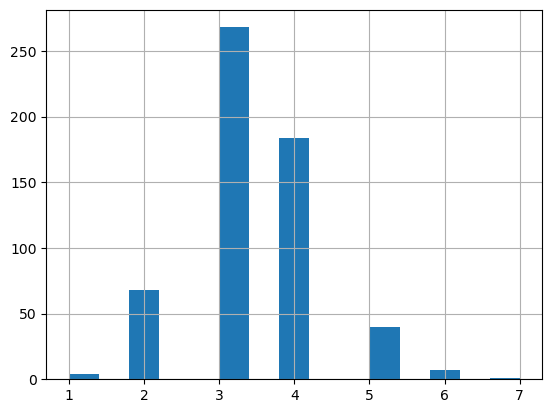

In [21]:
ds.bedrooms.hist(bins=15)

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'flooors'}>, <Axes: >]], dtype=object)

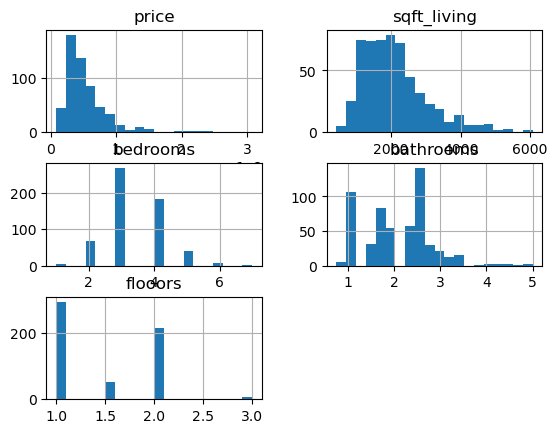

In [22]:
ds.hist(bins=20)

In [23]:
from scipy.stats import pearsonr
stats,ps=pearsonr(ds.sqft_living,ds.bedrooms)
stats,ps

(0.5804885508091233, 7.871566618823849e-53)

In [25]:
stats,ps=pearsonr(ds.sqft_living,ds.bathrooms)
stats,ps

(0.7508110081780366, 9.585406141562059e-105)

In [26]:
stats,ps=pearsonr(ds.price,ds.sqft_living)
stats,ps

(0.718697502886952, 5.162650572245992e-92)

In [27]:
stats,ps=pearsonr(ds.price,ds.bedrooms)
stats,ps

(0.3425193800422192, 3.4482099311390656e-17)

In [28]:
stats,ps=pearsonr(ds.price,ds.bathrooms)
stats,ps

(0.5171478132345687, 1.9415113570908146e-40)

In [30]:
stats,ps=pearsonr(ds.price,ds.flooors)
stats,ps

(0.04609110818028218, 0.2711088762317086)

In [31]:
ds1=pd.DataFrame({'sqft_living':[3500,3000,4000],'bedrooms':[6,7,8],'bathrooms':[3.5,4,5]})
ds1=sm.add_constant(ds1)


In [32]:
ds1

,const,sqft_living,bedrooms,bathrooms
0,1.0,3500,6,3.5
1,1.0,3000,7,4.0
2,1.0,4000,8,5.0
